In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import imblearn
warnings.filterwarnings('ignore')

In [146]:
df=pd.read_csv('../input/bank-marketing-data-set/bank-direct-marketing-campaigns.csv')

About Dataset

Relevant Information:

The data is related wit direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.


Number of Instances: 45211

Number of Attributes: 16 + output attribute.

Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a 
previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

# I.FEATURE ENGINEERING:

## I.1. EDA:

In [147]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [149]:
df.shape

(41188, 20)

In [150]:
y=df['y']
df.drop(['y'],axis=1,inplace=True)

In [151]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [152]:
df.select_dtypes(np.object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [153]:
cat_df=df[df.select_dtypes(np.object).columns]
num_df=df.drop(df.select_dtypes(np.object).columns,axis=1)

In [154]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

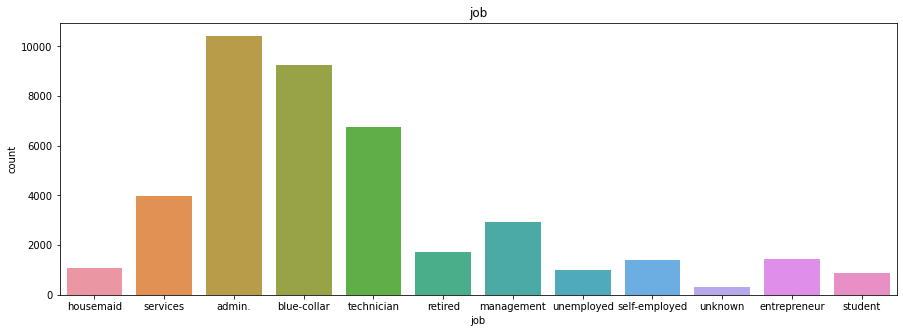

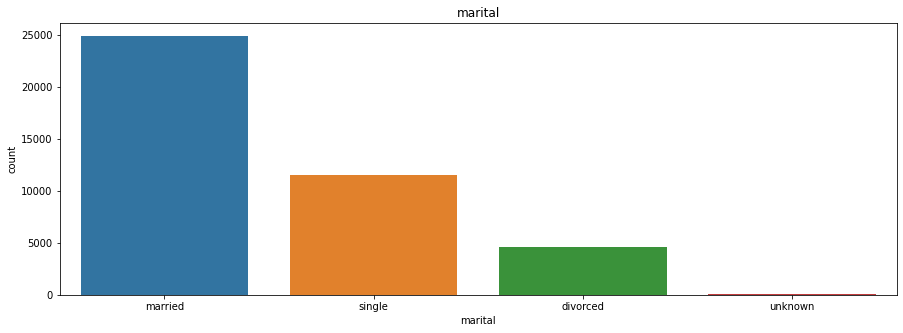

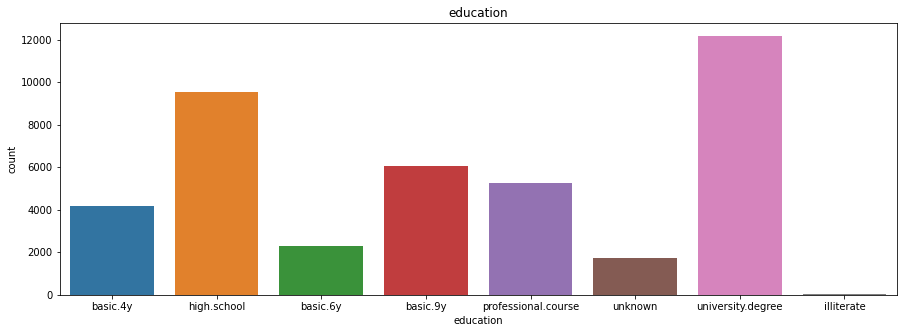

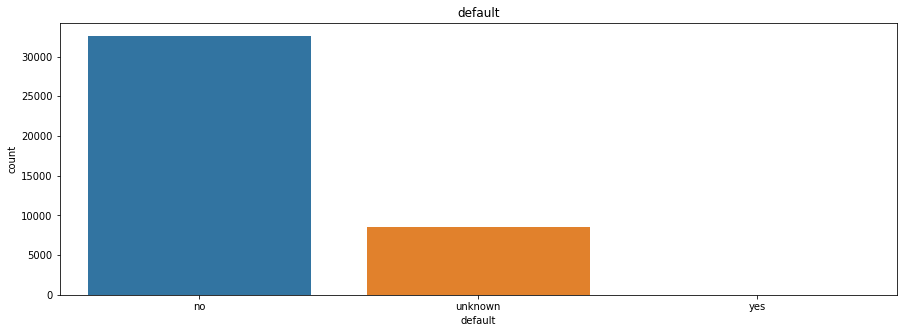

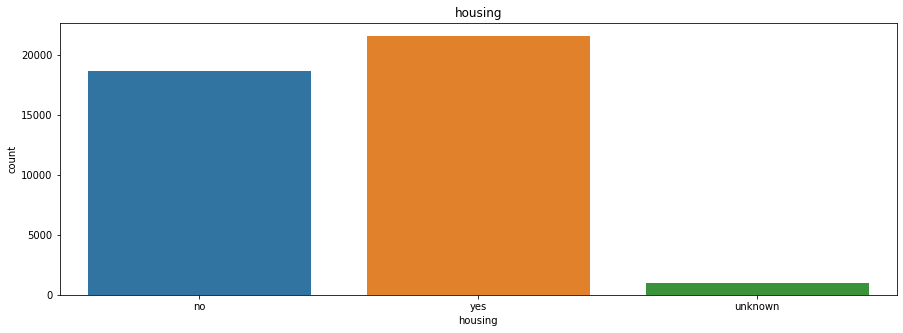

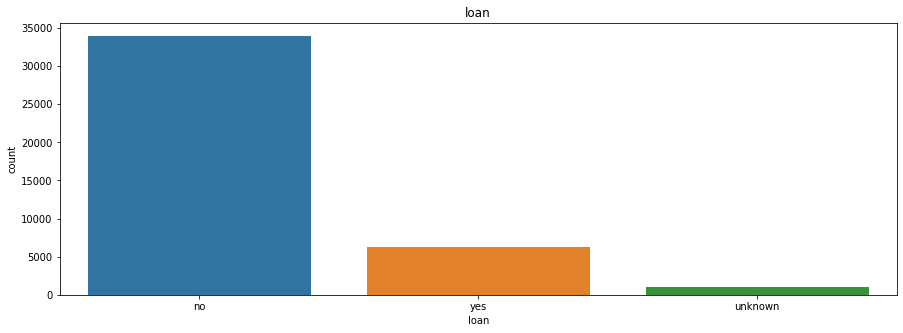

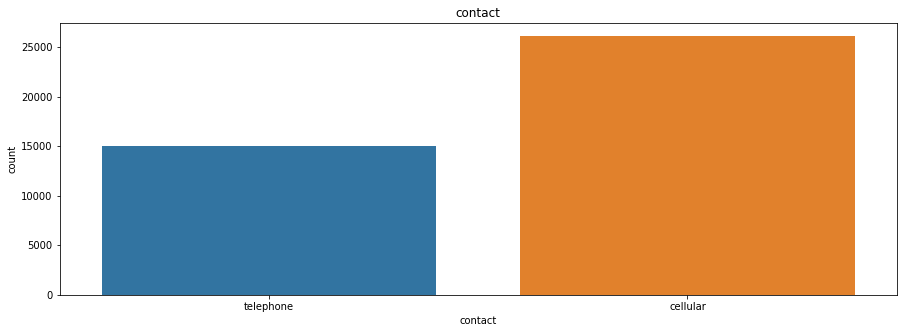

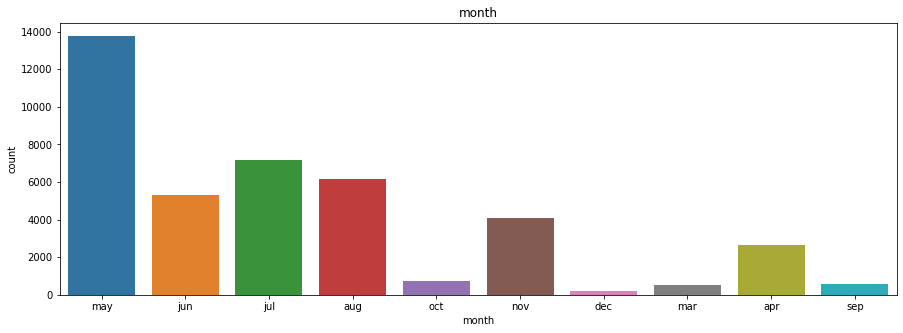

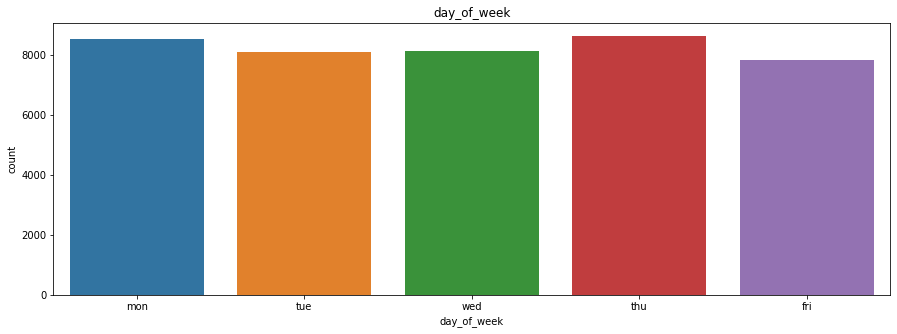

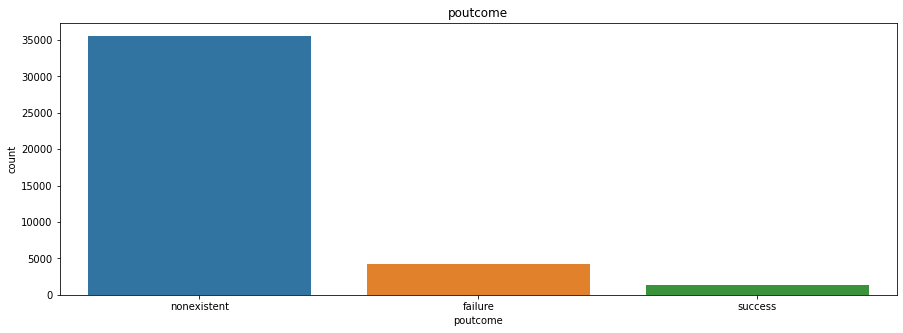

In [155]:
for col in cat_df.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(cat_df[col])
    plt.title(col)

In [156]:
num_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [157]:
num_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


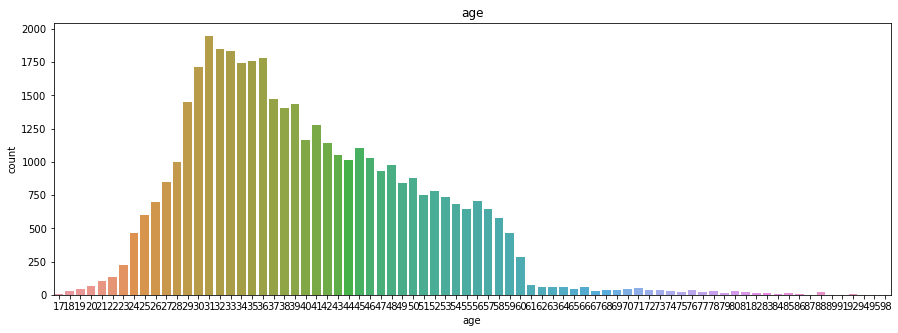

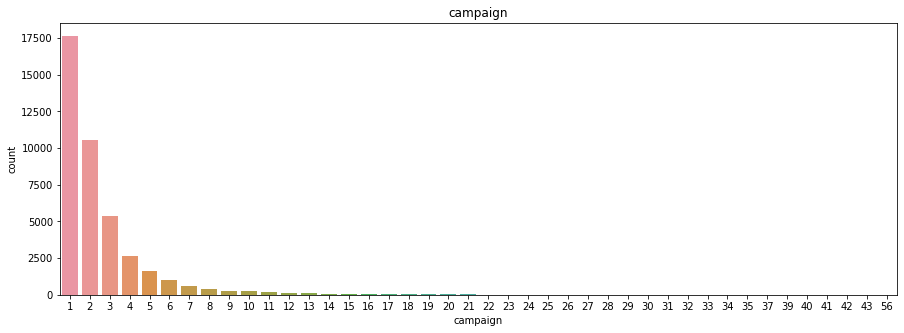

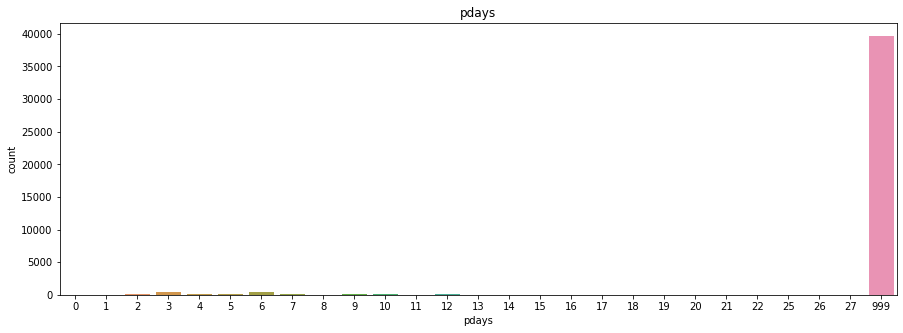

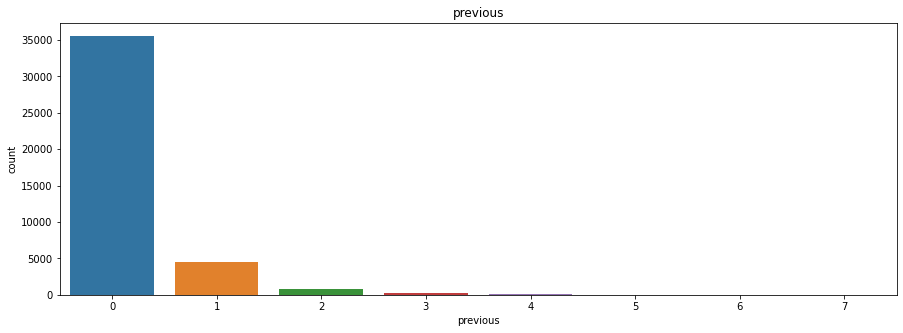

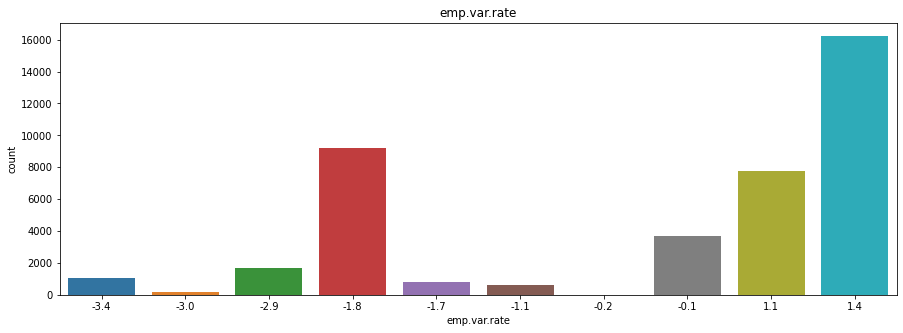

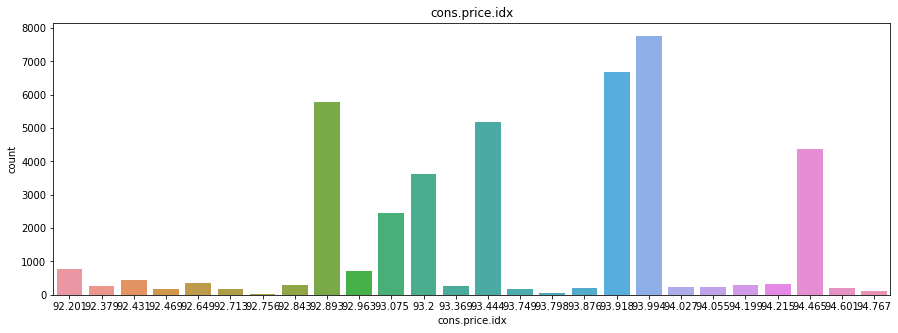

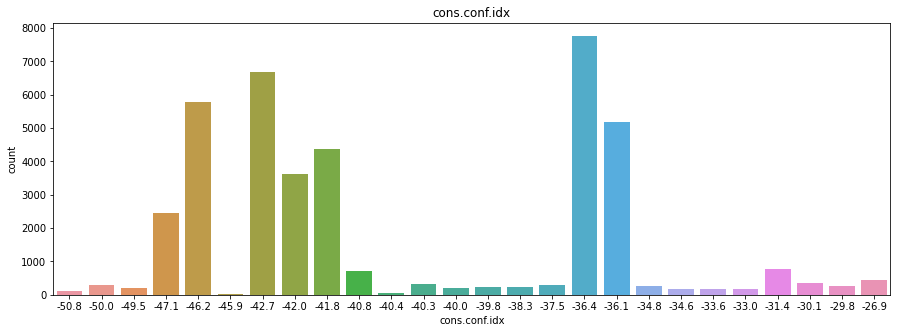

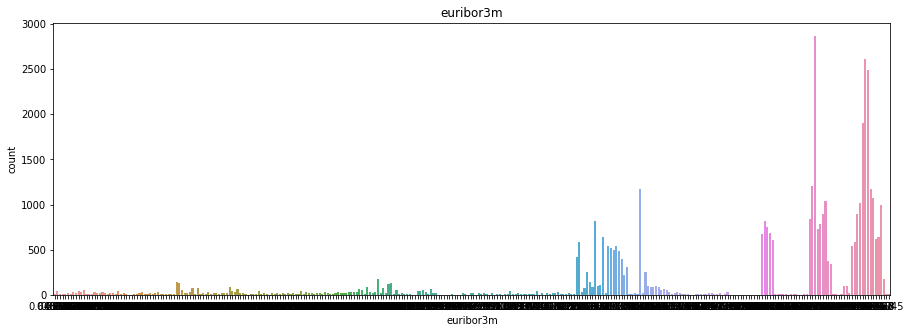

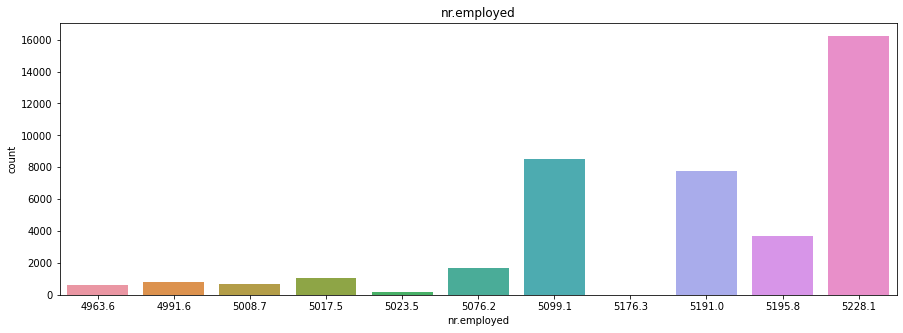

In [158]:
for col in num_df.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(x=num_df[col])
    plt.title(col)

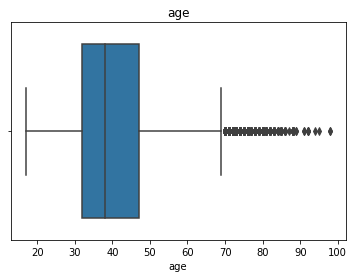

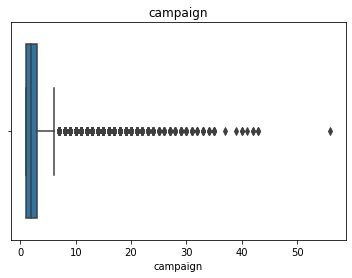

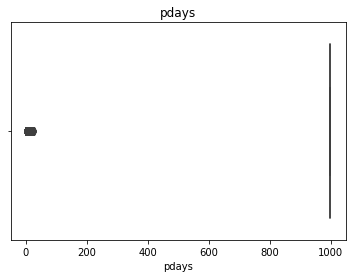

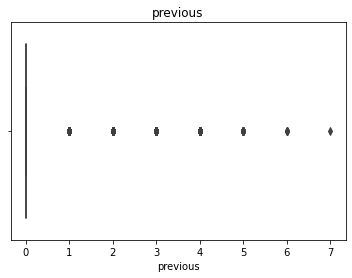

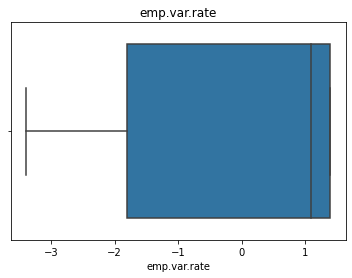

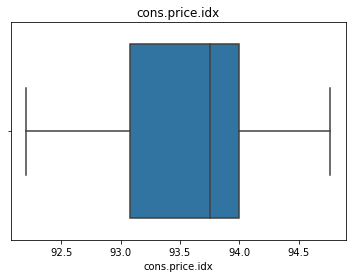

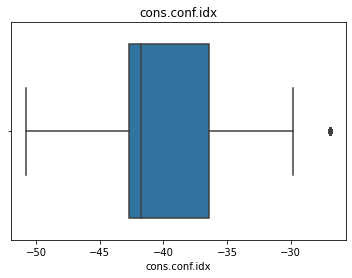

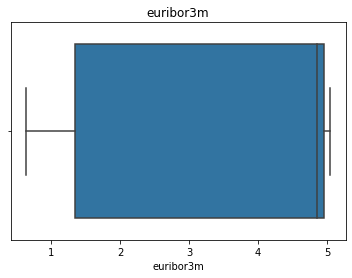

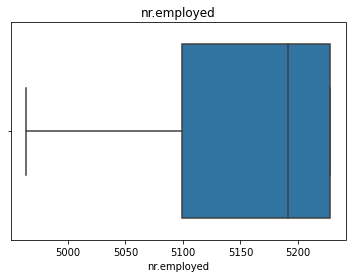

In [159]:
for col in num_df.columns:
    plt.figure()
    sns.boxplot(x=num_df[col])
    plt.title(col)


# I.2.Handling the missing values:

In [160]:
from sklearn.impute import SimpleImputer

In [161]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['marital']=si.fit_transform(np.array(cat_df['marital']).reshape(-1,1))
cat_df['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [162]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['education']=si.fit_transform(np.array(df['education']).reshape(-1,1))
cat_df['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [163]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['default']=si.fit_transform(np.array(df['default']).reshape(-1,1))
cat_df['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [164]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['housing']=si.fit_transform(np.array(df['housing']).reshape(-1,1))
cat_df['housing'].value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

In [165]:
si=SimpleImputer(missing_values='unknown',strategy='most_frequent')
cat_df['loan']=si.fit_transform(np.array(df['loan']).reshape(-1,1))
cat_df['loan'].value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

 # I.3 Balancing the data: over Sampling

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
sc=MinMaxScaler()
num_df[num_df.columns]=sc.fit_transform(num_df)

In [168]:
num_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


## I.4. Converting the categorical features into numerical features:

In [169]:
for col in cat_df.columns:
    enc=pd.get_dummies(cat_df[col],drop_first=True).astype('int')
    for col0 in enc.columns:
        enc[str(col0+'_'+col)]=enc[col0]
        enc.drop([col0],axis=1,inplace=True)
    cat_df=pd.concat([cat_df,enc],axis=1)
    cat_df.drop([col],axis=1,inplace=True)

In [170]:
cat_df.head()

,blue-collar_job,entrepreneur_job,housemaid_job,management_job,retired_job,self-employed_job,services_job,student_job,technician_job,unemployed_job,...,may_month,nov_month,oct_month,sep_month,mon_day_of_week,thu_day_of_week,tue_day_of_week,wed_day_of_week,nonexistent_poutcome,success_poutcome
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


## I.5 Concat(num_features,cat_features):

In [171]:
final_df=pd.concat([num_df,cat_df],axis=1)
final_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,blue-collar_job,...,may_month,nov_month,oct_month,sep_month,mon_day_of_week,thu_day_of_week,tue_day_of_week,wed_day_of_week,nonexistent_poutcome,success_poutcome
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,1,0,0,0,1,0,0,0,1,0


#  I.6 Balancing the dataset:

In [172]:
from imblearn.over_sampling import SMOTE

In [173]:
smote=SMOTE(sampling_strategy='minority')
final_df_sm,y_sm=smote.fit_resample(final_df,y)
y_sm.value_counts()

no     36548
yes    36548
Name: y, dtype: int64

In [174]:
final_df_sm.shape,y_sm.shape

((73096, 47), (73096,))

# I.7 Duplicated?

In [175]:
pd.concat([final_df_sm,y_sm],axis=1).shape

(73096, 48)

In [176]:
pd.concat([final_df_sm,y_sm],axis=1).duplicated().sum()

2514

In [177]:
all_df_without_dup=pd.concat([final_df_sm,y_sm],axis=1).drop_duplicates(keep='first')
all_df_without_dup.shape

(70582, 48)

In [188]:
y_sm=all_df_without_dup['y']
final_df_sm=all_df_without_dup.drop(['y'],axis=1)
y_sm.shape,final_df_sm.shape

((70582,), (70582, 47))

In [189]:
y_sm=y_sm.map({'yes':int(1),'no':int(0)})
y_sm.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(final_df_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [182]:
y_train_sm.value_counts(),y_test_sm.value_counts()

(1    28869
 0    27596
 Name: y, dtype: int64,
 1    7218
 0    6899
 Name: y, dtype: int64)

# II.FEATURE SELECTION:

## II.1 VarianceThreshold:

In [212]:
from sklearn.feature_selection import VarianceThreshold

In [221]:
x_train_sm.shape

(56465, 47)

In [251]:
VarThresh=VarianceThreshold(0.1)
VarThresh.fit_transform(x_train_sm)
print('columns :',x_train_sm.columns[VarThresh.get_support()])
print('\n number of columns :',VarThresh.get_support().sum())

columns : Index(['emp.var.rate', 'euribor3m', 'nr.employed', 'blue-collar_job',
       'technician_job', 'married_marital', 'single_marital',
       'basic.9y_education', 'high.school_education',
       'professional.course_education', 'university.degree_education',
       'yes_housing', 'yes_loan', 'telephone_contact', 'aug_month',
       'jul_month', 'jun_month', 'may_month', 'mon_day_of_week',
       'thu_day_of_week', 'tue_day_of_week', 'wed_day_of_week',
       'nonexistent_poutcome'],
      dtype='object')

 number of columns : 23


In [253]:
var_threshold_cols=x_train_sm.columns[VarThresh.get_support()]

# II.2. Correlation:

<AxesSubplot:>

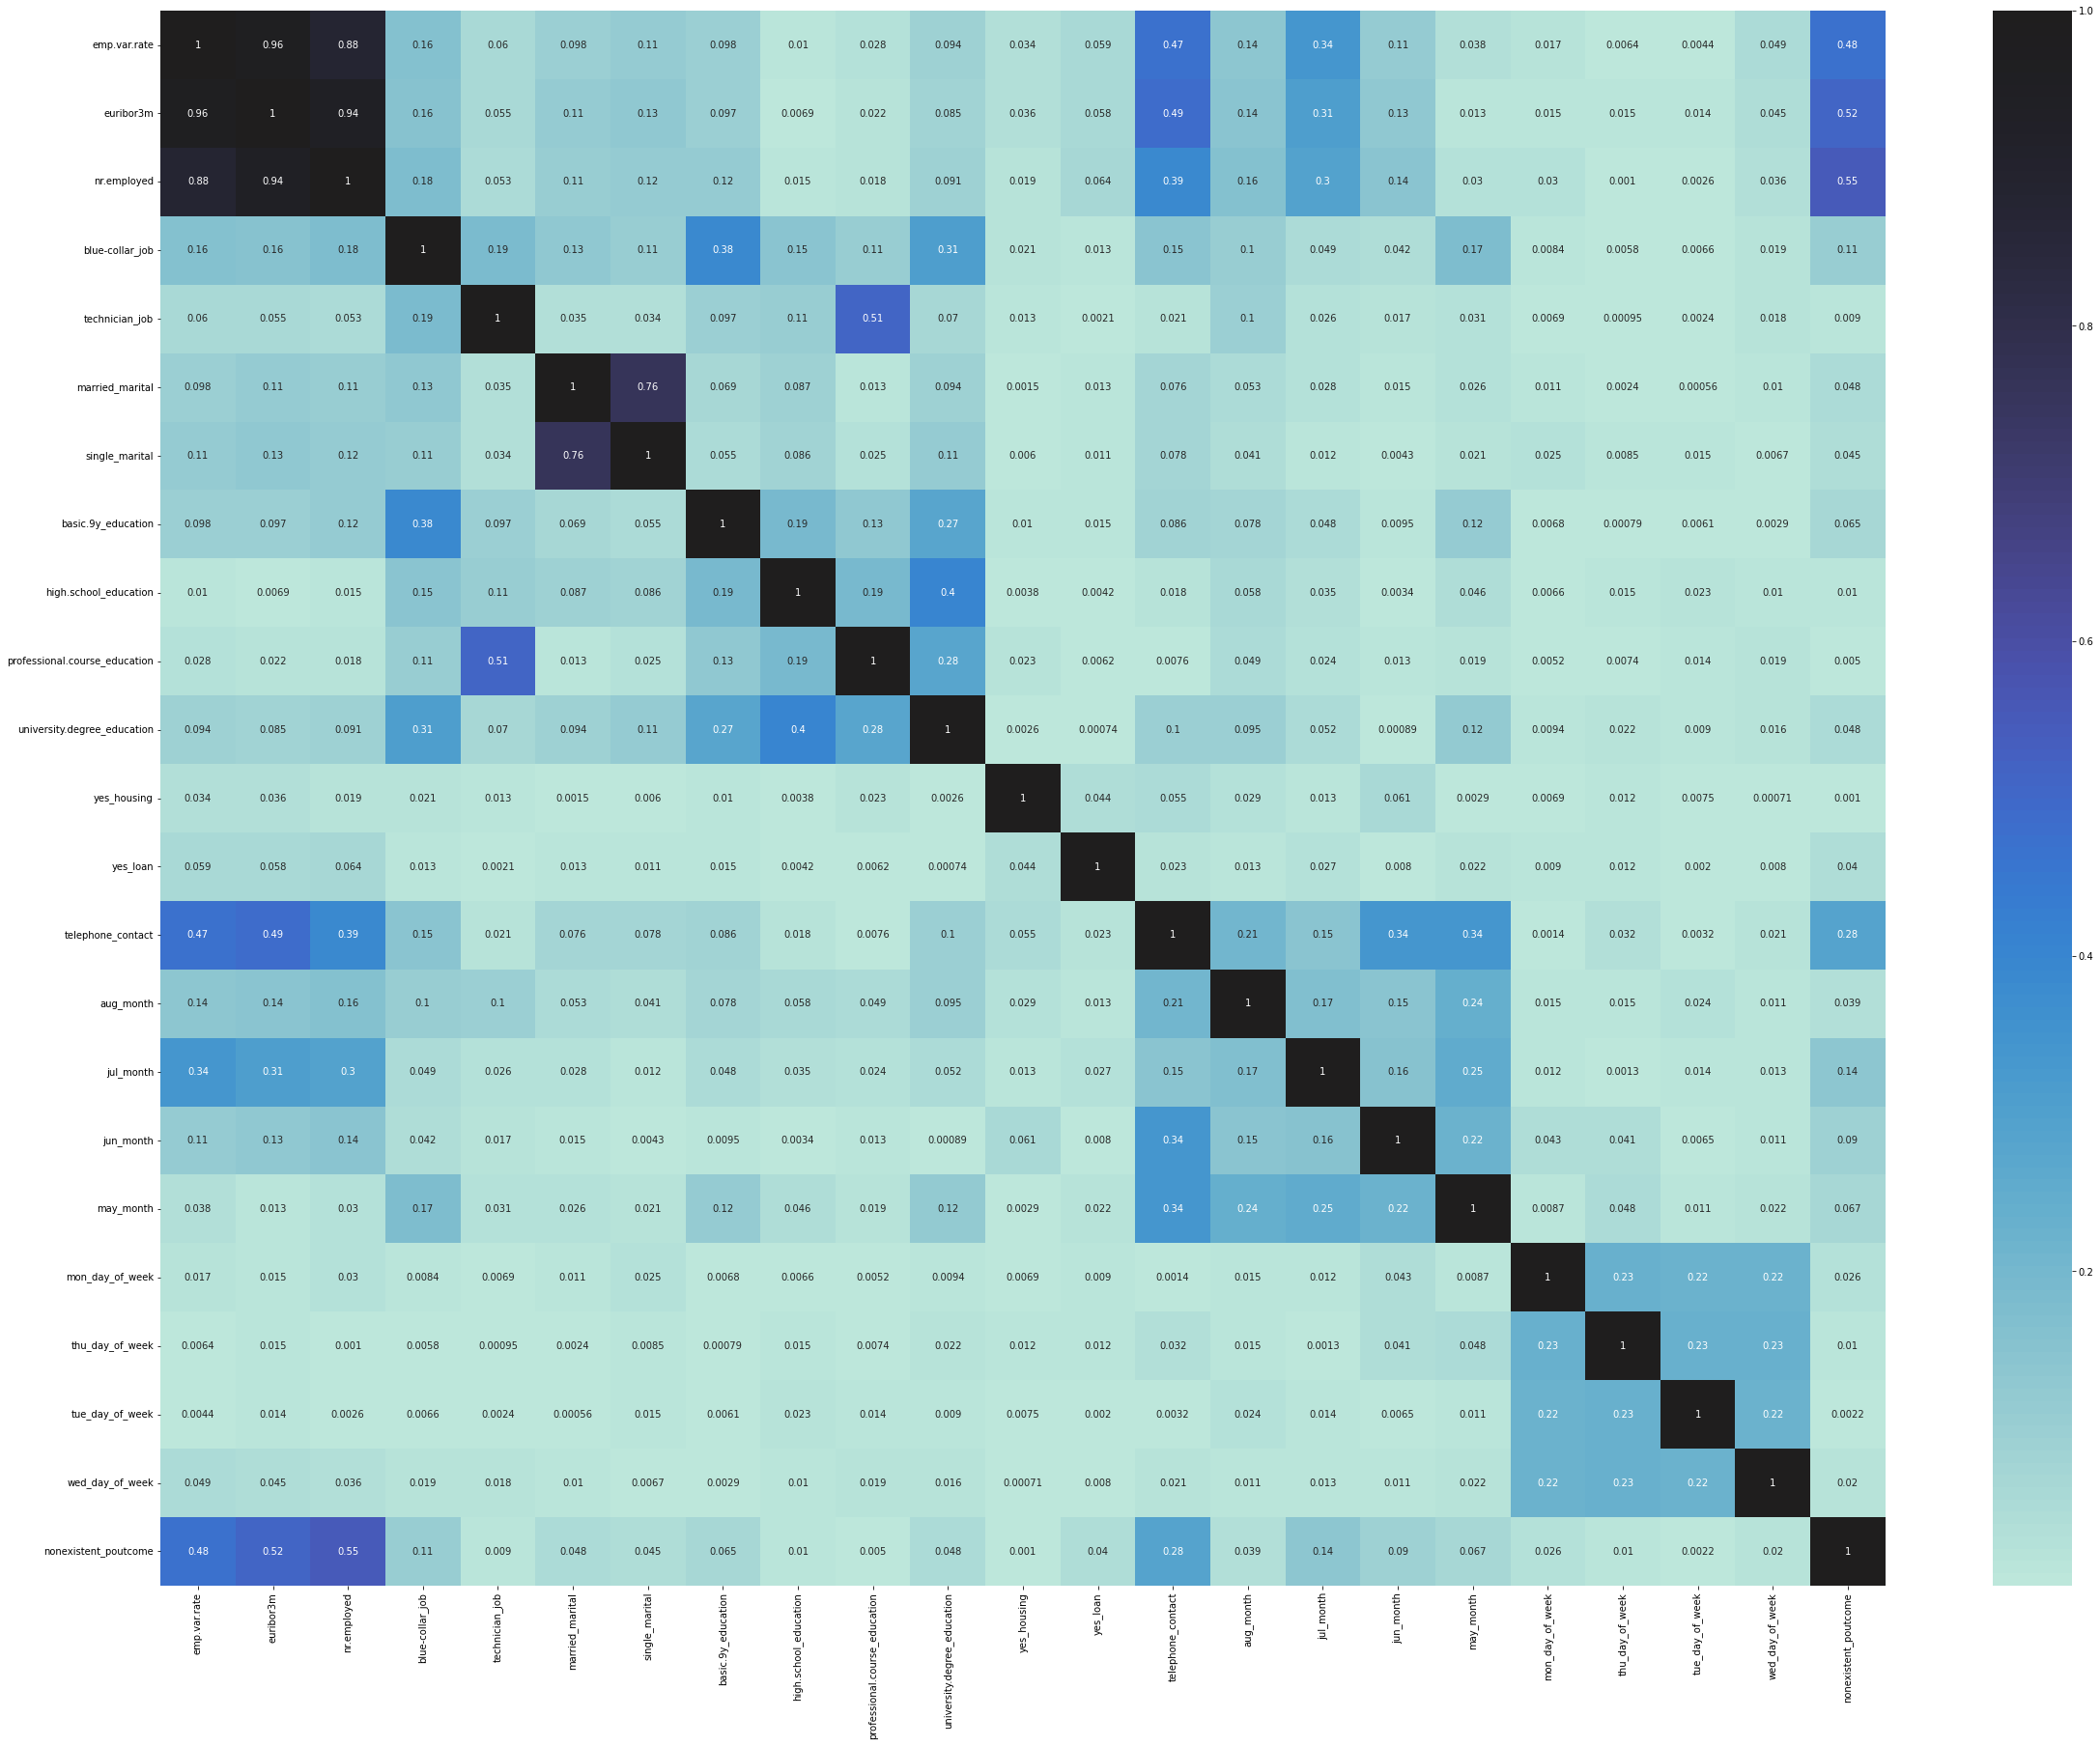

In [254]:
plt.figure(figsize=(40,30))
sns.heatmap(x_train_sm[var_threshold_cols].corr().abs(),annot=True,center=1)

In [269]:
def correlation(dataset,threshold=0.7):
    corr=dataset.corr().abs()
    columns_index=[]
    for i in range(len(corr)):
        for j in range(i):
            if corr.iloc[i,j]>=threshold:
                columns_index.append(i)
    return dataset.columns[columns_index].unique()

In [292]:
corr_val_threshold_cols=correlation(x_train_sm[var_threshold_cols],0.5)

<AxesSubplot:>

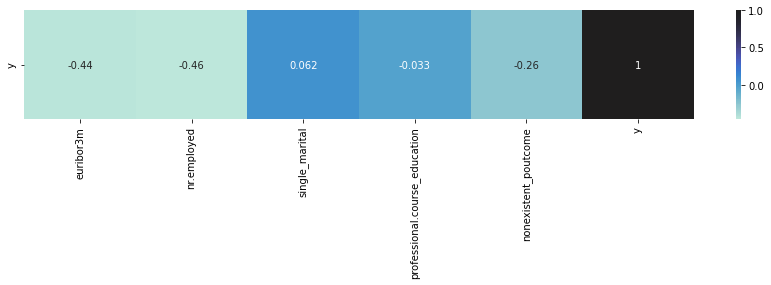

In [284]:
plt.figure(figsize=(15,2))
sns.heatmap(pd.concat([x_train_sm[corr_val_threshold_cols],y_train_sm],axis=1).corr()[-1:],annot=True,center=1)

In [286]:
from sklearn.feature_selection import mutual_info_classif

In [293]:
mutual_info_classif(x_train_sm[corr_val_threshold_cols],y_train_sm)

array([3.66394862e-01, 1.60408204e-01, 3.85401599e-05, 0.00000000e+00,
       3.92203693e-02])

## II.2 SelectFromModel:

In [191]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [192]:
DTC=DecisionTreeClassifier()
sfm=SelectFromModel(DTC)
sfm.fit_transform(x_train_sm,y_train_sm)
best_features=sfm.get_feature_names_out()
best_features

array(['age', 'campaign', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype=object)

In [193]:
sgdc=SGDClassifier()
sfm=SelectFromModel(sgdc)
sfm.fit_transform(x_train_sm,y_train_sm)
best_features=sfm.get_feature_names_out()
best_features

array(['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'euribor3m', 'entrepreneur_job', 'housemaid_job', 'unemployed_job',
       'unknown_job', 'telephone_contact', 'jun_month', 'may_month',
       'nov_month', 'sep_month'], dtype=object)

# III. Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## III.1 RandomForestClassifier:

In [ ]:
rfc_params={
    'n_estimators':[20,50,80,120,150,200,300,400],
    'max_depth':[2,5,8,12,20,40,50,None]
}
rsv_rfc=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=rfc_params,n_iter=100,n_jobs=4,verbose=0)
rsv_rfc.fit(best_x_train,y_train)

In [ ]:
rsv_rfc.best_estimator_

In [ ]:
rsv_rfc.best_score_

In [ ]:
rsv_rfc.score(best_x_test,y_test)

In [ ]:
import pickle
pickle.dump(rsv_rfc.best_estimator_,open('random_forest_classifier.pkl','wb'))

## III.2 KNN:

In [ ]:
KNN_params={'n_neighbors':np.arange(5,50,1)}
knn_rsv=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=KNN_params,n_iter=100,n_jobs=4,cv=4,verbose=0)
knn_rsv.fit(best_x_train,y_train)

In [ ]:
knn_rsv.best_estimator_

In [ ]:
knn_rsv.best_score_

In [ ]:
knn_rsv.score(best_x_test,y_test)

## III.3 SVC

In [ ]:
svc_params={
    "gamma":[ 0.1,1]
}
svc_rsc=RandomizedSearchCV(estimator=SVC(),param_distributions=svc_params)
svc_rsc.fit(best_x_train,y_train)

In [ ]:
svc_rsc.best_score_

In [ ]:
svc_rsc.best_estimator_

In [ ]:
svc_rsc.best_estimator_.score(best_x_test,y_test)

# IV.BOOSTING:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada.fit(best_x_train,y_train)

In [ ]:
ada.score(best_x_train,y_train)

In [ ]:
ada.score(best_x_test,y_test)

# V.VOTING:

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
estimators={('rfc',RandomForestClassifier(max_depth=8, n_estimators=50)),
            ('knn',KNeighborsClassifier(n_neighbors=46)),
            ('svc',SVC(gamma=1,probability=True))
           }
VC=VotingClassifier(estimators=estimators,voting='soft')
VC.fit(best_x_train,y_train)

In [ ]:
y_pred=VC.predict(best_x_test)
print(classification_report(y_test,y_pred))

In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [ ]:
y_pred=VC.predict(best_x_train)
print(classification_report(y_train,y_pred))